In [74]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
import operator
from sklearn.metrics import roc_curve, auc

In [2]:
# # The clothing-store data set contains information about 28,799 customers in the following 51 fields:

# Customer ID: unique, encrypted customer identification HHKEY
# Zip code ZIP_CODE
# Number of purchase visits FRE
# Total net sales MON
# Average amount spent per visit AVRG
# Amount spent at each of four different franchises (four variables) AMSPEND, PSSPEND, CCSPEND, AXSPEND
# Amount spent in the past month, the past three months, and the past six months OMONSPEND, TMONSPEND, SMONSPEND
# Amount spent the same period last year PREVPD
# Gross margin percentage GMP
# Number of marketing promotions on file PROMOS
# Number of days the customer has been on file DAYS
# Number of days between purchases FREDAYS
# Markdown percentage on customer purchases MARKDOWN
# Number of different product classes purchased CLASSES
# Number of coupons used by the customer COUPONS
# Total number of individual items purchased by the customer STYLES
# Number of stores the customer shopped at STORES
# Number of promotions mailed in the past year MAILED
# Number of promotions responded to in the past year RESPONDED
# Promotion response rate for the past year RESPONSERATE
# Product uniformity (low score = diverse spending patterns) HI
# Lifetime average time between visits LTFREDAYS
# Microvision lifestyle cluster type CLUSTYPE
# Percent of returns PERCRET
# Flag: credit card user CC_CARD
# Flag: valid phone number on file VALPHON
# Flag: Web shopper WEB
# 15 variables providing the percentages spent by the customer on specific classes of clothing, including sweaters, knit tops, knit dresses, blouses, jackets, career pants, casual pants, shirts, dresses, suits, outerwear, jewelry, fashion, legwear, and the collectibles line; (P*, PJACKETS for example) also a variable showing the brand of choice (encrypted)
# Target variable: response to promotion RESP...this is our response or y.
# These data are based on a direct mail marketing campaign conducted last year. We want to use this information to develop classification models for this year’s marketing campaign.

In [3]:
ls

 Volume in drive C is BOOTCAMP
 Volume Serial Number is F211-E14E

 Directory of C:\Users\mac\Desktop\Data2018\Customer_Classification

02/10/2018  03:06 PM    <DIR>          .
02/10/2018  03:06 PM    <DIR>          ..
02/07/2018  09:47 PM    <DIR>          .ipynb_checkpoints
02/09/2018  08:10 AM         1,032,014 Classification.ipynb
05/25/2017  08:51 PM         7,980,833 Clothing_Store.csv
09/12/2017  10:54 PM         6,597,229 Data-Mining-Methods-and-Models-Larose-2006.pdf
02/09/2018  07:35 PM         1,747,920 Direct_Marketing.ipynb
               4 File(s)     17,357,996 bytes
               3 Dir(s)  69,984,055,296 bytes free


In [468]:
df=pd.read_csv('Clothing_Store.csv')

In [469]:
df=df.head(7000)

In [6]:
df.HHKEY.unique().shape[0]

7000L

In [7]:
df.shape

(7000, 51)

In [8]:
df=df.drop(['HHKEY','ZIP_CODE'],axis=1)

In [9]:
df.shape

(7000, 49)

### Business profit and cost

Lets assume the amortized cost of preparing a mailing and mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).

In [10]:
prep_and_mail=3
profit_margin=0.3
print "The average of Average amount spent per visit is {} dollars.".format(df.AVRG.mean())
print "The average profit of per visit is {} dollars.".format(df.AVRG.mean()*profit_margin)

The average of Average amount spent per visit is 114.644022857 dollars.
The average profit of per visit is 34.3932068571 dollars.


### Feature Engineering & Classify categorical variables and quantatitive variables. 

In [11]:
variables={}
for v in df.columns:
    l=df[v].unique()
    variables[v]=len(l) 

In [12]:
sorted_variables = sorted(variables.items(), key=operator.itemgetter(1),reverse=True)
sorted_variables

[('MON', 5392),
 ('AVRG', 4996),
 ('CCSPEND', 4420),
 ('HI', 3923),
 ('SMONSPEND', 3808),
 ('LTFREDAY', 3510),
 ('FREDAYS', 2602),
 ('PSSPEND', 2520),
 ('TMONSPEND', 2381),
 ('PREVPD', 1221),
 ('OMONSPEND', 922),
 ('AXSPEND', 773),
 ('DAYS', 677),
 ('STORELOY', 550),
 ('AMSPEND', 376),
 ('PLEGWEAR', 373),
 ('REC', 361),
 ('PJEWELRY', 349),
 ('PERCRET', 220),
 ('PFASHION', 208),
 ('PKNIT_TOPS', 202),
 ('STYLES', 165),
 ('PKNIT_DRES', 149),
 ('PCAS_PNTS', 117),
 ('PDRESSES', 110),
 ('PSWEATERS', 109),
 ('PBLOUSES', 105),
 ('PCOLLSPND', 105),
 ('PCAR_PNTS', 101),
 ('PSHIRTS', 100),
 ('PJACKETS', 96),
 ('PSUITS', 96),
 ('POUTERWEAR', 93),
 ('MARKDOWN', 85),
 ('GMP', 85),
 ('FRE', 62),
 ('CLUSTYPE', 51),
 ('RESPONSERATE', 43),
 ('PROMOS', 36),
 ('CLASSES', 35),
 ('COUPONS', 22),
 ('STORES', 17),
 ('MAILED', 12),
 ('RESPONDED', 12),
 ('PC_CALC20', 6),
 ('VALPHON', 2),
 ('WEB', 2),
 ('RESP', 2),
 ('CC_CARD', 2)]

In [13]:
for v in df.columns:
    l=df[v].unique()
    if len(l)<5:
        print v,l

CC_CARD [0 1]
VALPHON ['N' 'Y']
WEB [0 1]
RESP [0 1]


#### Transform indicator string to numeric

In [14]:
df['VALPHON']=(df['VALPHON']=='Y')*1

In [15]:
list(df.columns[map(lambda x:str(x)[0]=='P',df.columns.values)])

['PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'PSSPEND',
 'PREVPD',
 'PROMOS',
 'PERCRET']

In [16]:
df.shape

(7000, 49)

In [17]:
numerical_variable_list=[ 'MON',
 'CCSPEND',
 'AVRG',
 'SMONSPEND',
#  'ZIP_CODE',
 'HI',
 'PSSPEND',
 'TMONSPEND',
 'LTFREDAY',
 'FREDAYS',
 'PREVPD',
 'OMONSPEND',
 'AXSPEND',
#  'STORELOY',
'AMSPEND',
 'DAYS',
          'PERCRET',
     'STYLES',     
                             'MARKDOWN',
                             'GMP',
 'FRE',
'RESPONSERATE',
 'PROMOS',
 'CLASSES',
 'COUPONS',
 'STORES',
 'MAILED',
 'RESPONDED',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',]

In [18]:
len(numerical_variable_list)

41

In [19]:
catigorical_variable_list=[
     'VALPHON',
 'WEB',
#  'RESP',
 'CC_CARD'
]

In [20]:
len(catigorical_variable_list)

3

#### Train Test Split

In [21]:
X=df[catigorical_variable_list+numerical_variable_list].values
y=df['RESP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [324]:
X_train.shape,y_train.shape

((4900L, 44L), (4900L,))

#### EDA for continuous features and indicators

In [23]:
df_train=pd.DataFrame(np.concatenate((X_train, y_train.reshape(X_train.shape[0],-1)), 
                                   axis=1),columns=catigorical_variable_list+numerical_variable_list+['RESP'])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [24]:
df_train.shape

(4900, 45)

#### continuous features

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


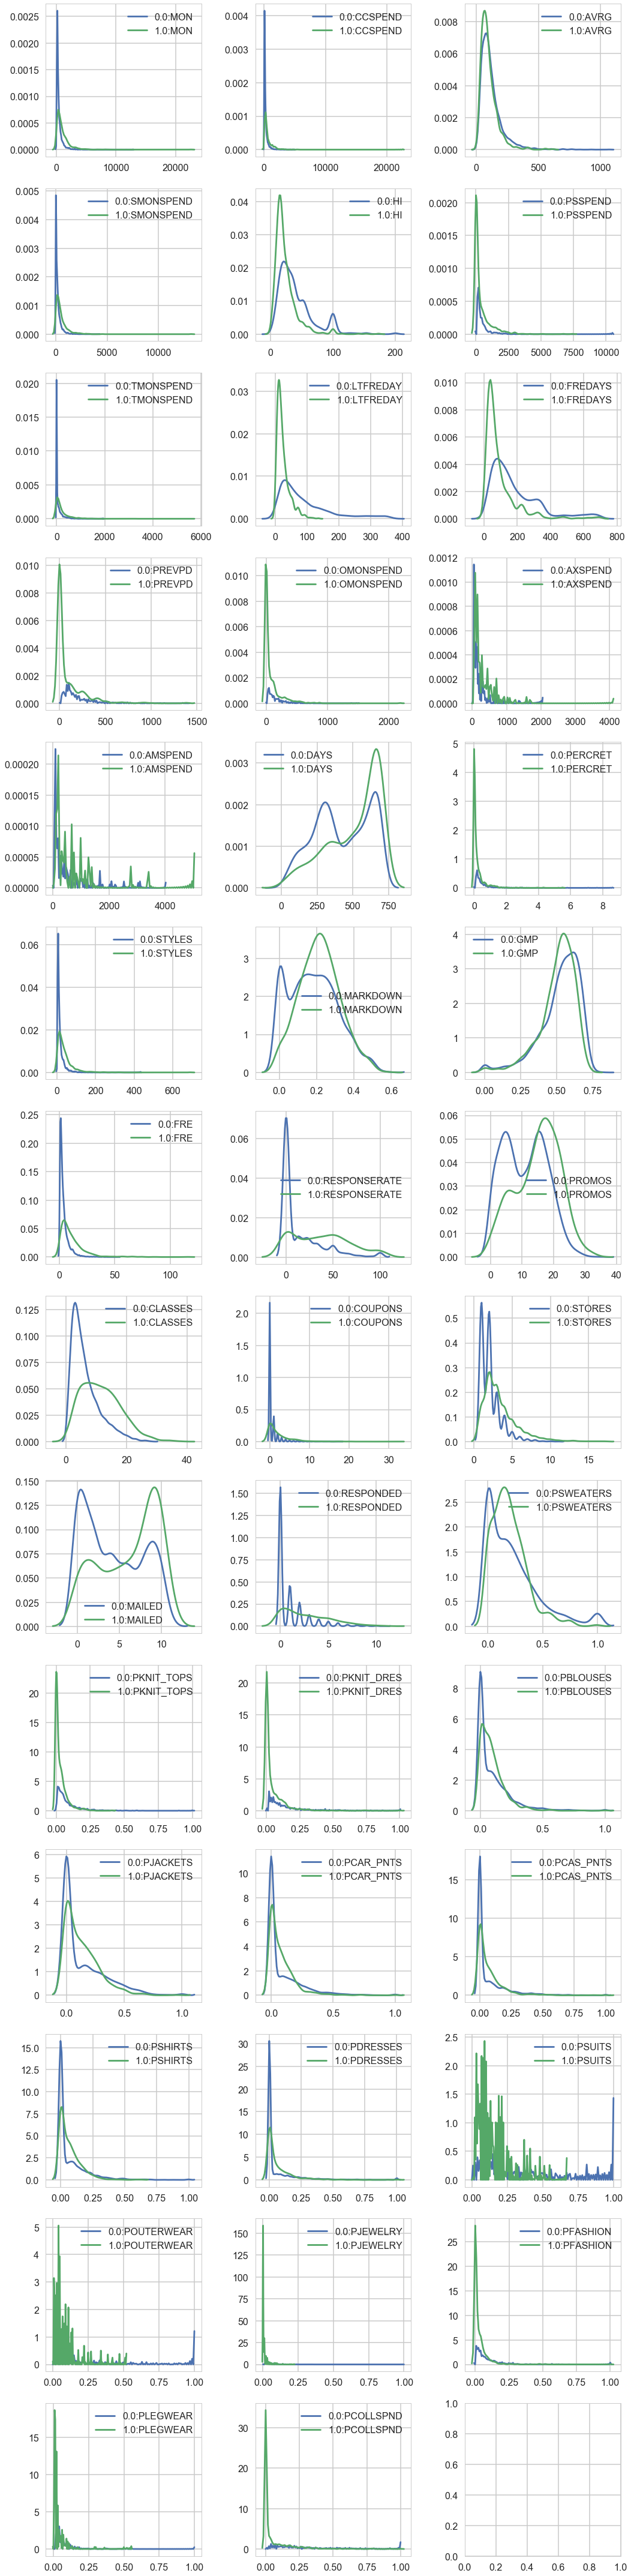

In [25]:
dfgb=df_train.groupby('RESP')
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(15, 60), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), numerical_variable_list):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)
# plt.savefig('Univariate Analysis Quantatitive Variable')
plt.show()

#### Categorical variables

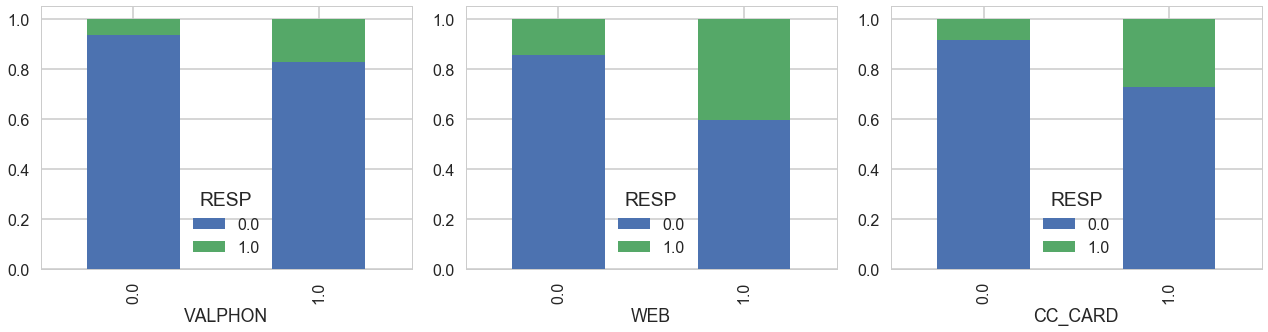

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), 
                         tight_layout=True)

for ax, p in zip(axes.ravel(), catigorical_variable_list): 
    table=pd.crosstab(df_train[p],df_train['RESP'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax,stacked='True')
# plt.savefig('Univariate Analysis Categorical Variable')
plt.show()

#### Feature Selection

We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns abscorr the absolute value of the correlation and corr the value of the correlation. Sort the dataframe by abscorr, highest first, and show the top 25 features with the highest absolute correlation.

In [27]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=df_train
for col in dftousetrain.columns.values:
    r=pearsonr(dftousetrain[col].values, df_train['RESP'].values)[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(15)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscorr,corr
feature,,
RESP,1.000000,1.000000
FRE,0.392355,0.392355
CLASSES,0.353676,0.353676
RESPONDED,0.336275,0.336275
STYLES,0.336263,0.336263
RESPONSERATE,0.331656,0.331656
COUPONS,0.310597,0.310597
LTFREDAY,0.302848,-0.302848
STORES,0.299307,0.299307


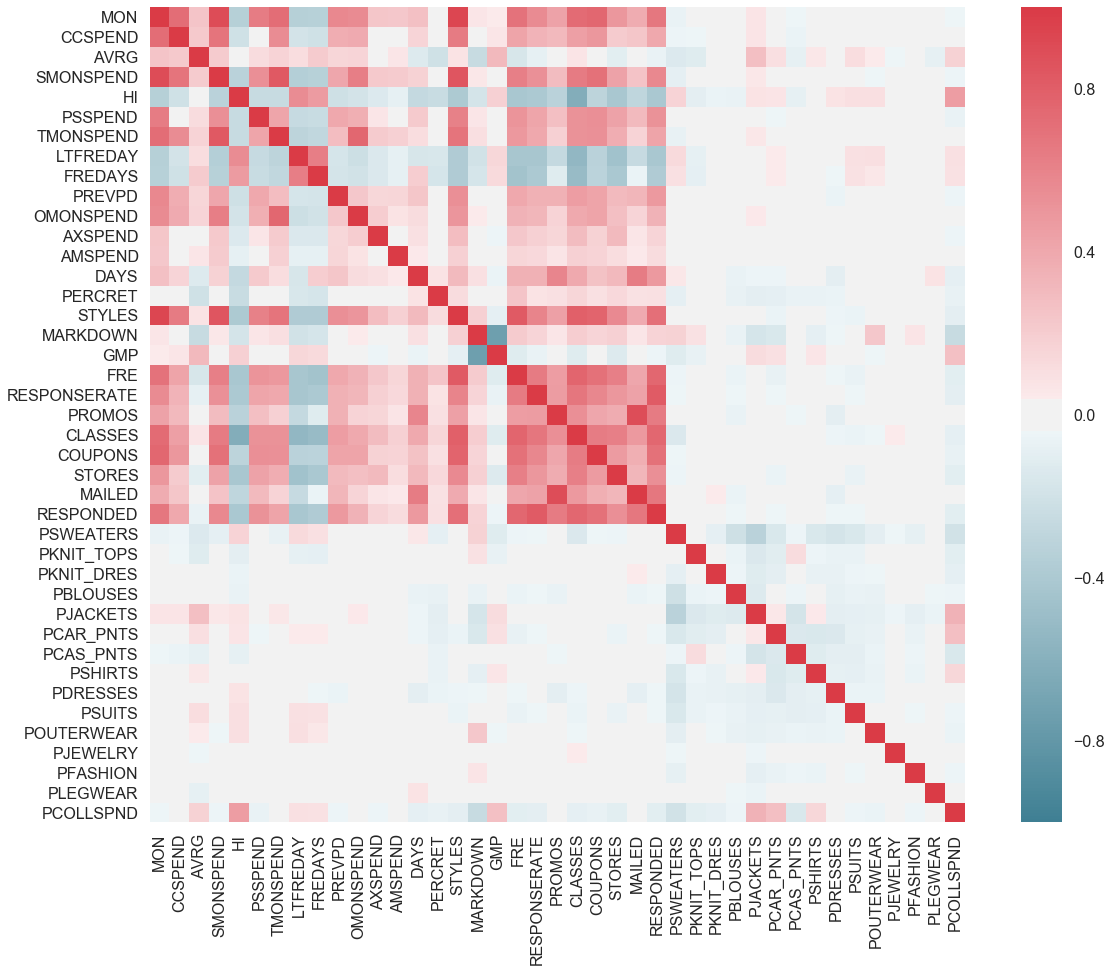

In [466]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))
corr = df_train[numerical_variable_list].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

### Building Models

#### Logistic regression and inference

In [29]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.314039
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   RESP   No. Observations:                 4900
Model:                          Logit   Df Residuals:                     4856
Method:                           MLE   Df Model:                           43
Date:                Sat, 10 Feb 2018   Pseudo R-squ.:                  0.2739
Time:                        15:07:21   Log-Likelihood:                -1538.8
converged:                       True   LL-Null:                       -2119.2
                                        LLR p-value:                3.552e-215
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0978      0.181     -0.539      0.590        -0.453     0.258
x2             0.3110      0.

In [30]:
def cv_optimize(clf, parameters, X_train, y_train, X_test, y_test, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters,  cv=n_folds)
    gs.fit(X_train, y_train)
        print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    clf = gs.best_estimator_
    clf=clf.fit(X_train, y_train)
    training_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(y_test, clf.predict(X_test))
    print "########################################################"
    return clf

#### Logistic Regression L1 Lass Feature importance, and L2 Ridge

In [31]:
# pd.DataFrame(X_train)

In [32]:
X_train[0][0].dtype

dtype('float64')

In [393]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1=cv_optimize(logclf,c,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'C': 100.0} 0.314280392878 [mean: 0.26140, std: 0.05521, params: {'C': 0.001}, mean: 0.29756, std: 0.05350, params: {'C': 0.1}, mean: 0.31414, std: 0.05981, params: {'C': 10.0}, mean: 0.31428, std: 0.06001, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[1727   29]
 [ 264   80]]
########################################################
Wall time: 3min 36s


#### Regularization

In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.861
Test set accuracy: 0.859
Training set accuracy: 0.861
Test set accuracy: 0.860


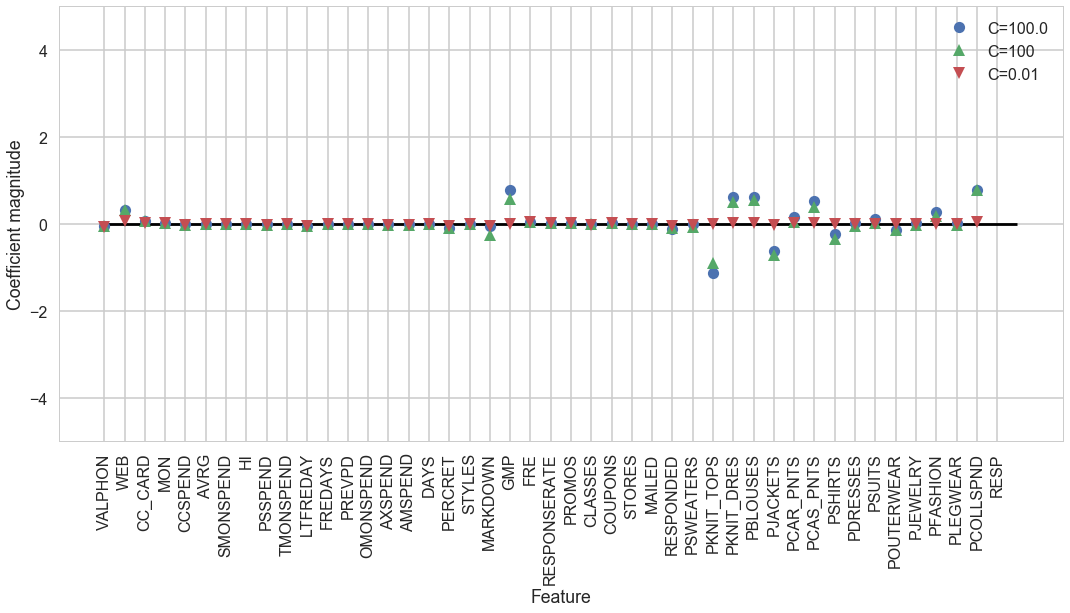

In [35]:
columns=df_train.columns
data_features = [x for i,x in enumerate(columns) if i!=8]

plt.figure(figsize=(18,8))
plt.plot(clf_l1.coef_.T, 'o', label="C={}".format(clf_l1.C))
plt.plot(logreg100.coef_.T, '^', label="C={}".format(logreg100.C))
plt.plot(logreg001.coef_.T, 'v', label="C={}".format(logreg001.C))
plt.xticks(range(df_train.shape[1]), columns, rotation=90)
plt.hlines(0, 0, df_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
# plt.savefig('log_coef')

In [36]:
def nonzero_lasso(clf,col):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=col, 
                             coef=clf.coef_[0], 
                             abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [37]:
df_train_columns=df_train.columns[:-1]

In [38]:
X_train.shape

(4900L, 44L)

In [39]:
df_train_columns.shape

(44L,)

In [40]:
lasso_importances=nonzero_lasso(clf_l1,df_train_columns)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscoef,coef
feature,,
PKNIT_TOPS,1.140716,-1.140716
GMP,0.779073,0.779073
PCOLLSPND,0.776209,0.776209
PJACKETS,0.638742,-0.638742
PBLOUSES,0.619545,0.619545
PKNIT_DRES,0.617077,0.617077
PCAS_PNTS,0.510531,0.510531
WEB,0.308774,0.308774
PFASHION,0.274103,0.274103


### Ridge Regression L2

In [41]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.0001, 0.01, 0.1, 1, 10, 100,1000]}
clf_l2=cv_optimize(logclf,c,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'C': 10} 0.312218982653 [mean: 0.27954, std: 0.06039, params: {'C': 0.0001}, mean: 0.30385, std: 0.05456, params: {'C': 0.01}, mean: 0.29795, std: 0.05960, params: {'C': 0.1}, mean: 0.30900, std: 0.06574, params: {'C': 1}, mean: 0.31222, std: 0.05753, params: {'C': 10}, mean: 0.30957, std: 0.06741, params: {'C': 100}, mean: 0.30972, std: 0.06549, params: {'C': 1000}]
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[1727   29]
 [ 267   77]]
########################################################
Wall time: 10.3 s


### KNN

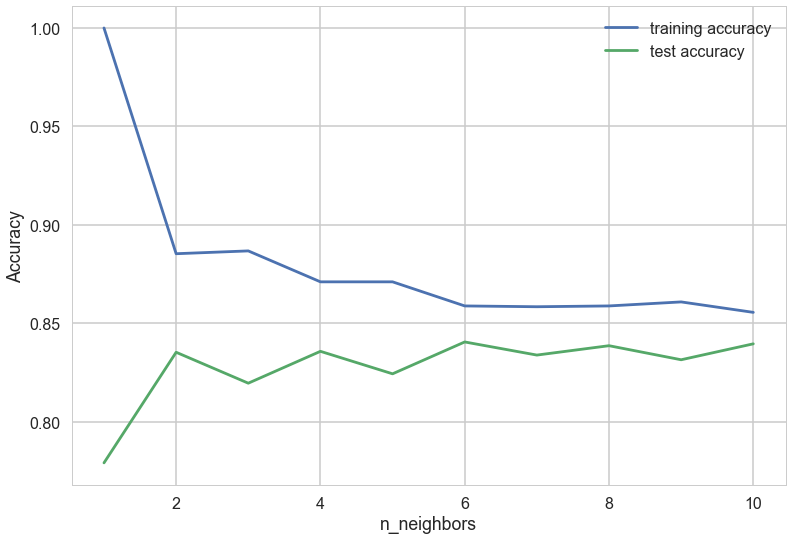

In [42]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [127]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
parameters={'n_neighbors':range(5,6,7)}
clf_knn=cv_optimize(clf,parameters,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'n_neighbors': 5} 0.262680573724 [mean: 0.26268, std: 0.02770, params: {'n_neighbors': 5}]
############# based on standard predict ################
Accuracy on training data: 0.87
Accuracy on test data:     0.82
[[1657   99]
 [ 270   74]]
########################################################


#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'n_estimators': 1, 'max_depth': 4, 'min_samples_leaf': 6} 0.37391908106 [mean: 0.31383, std: 0.11384, params: {'n_estimators': 1, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.33147, std: 0.06192, params: {'n_estimators': 2, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.29274, std: 0.07235, params: {'n_estimators': 3, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.29402, std: 0.04841, params: {'n_estimators': 4, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.29871, std: 0.05723, params: {'n_estimators': 5, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.30855, std: 0.04745, params: {'n_estimators': 6, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27356, std: 0.02798, params: {'n_estimators': 7, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.24180, std: 0.01944, params: {'n_estimators': 8, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27403, std: 0.04977, params: {'n_estimators': 9, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.24530, std: 0.07022, params: {'n_estimat

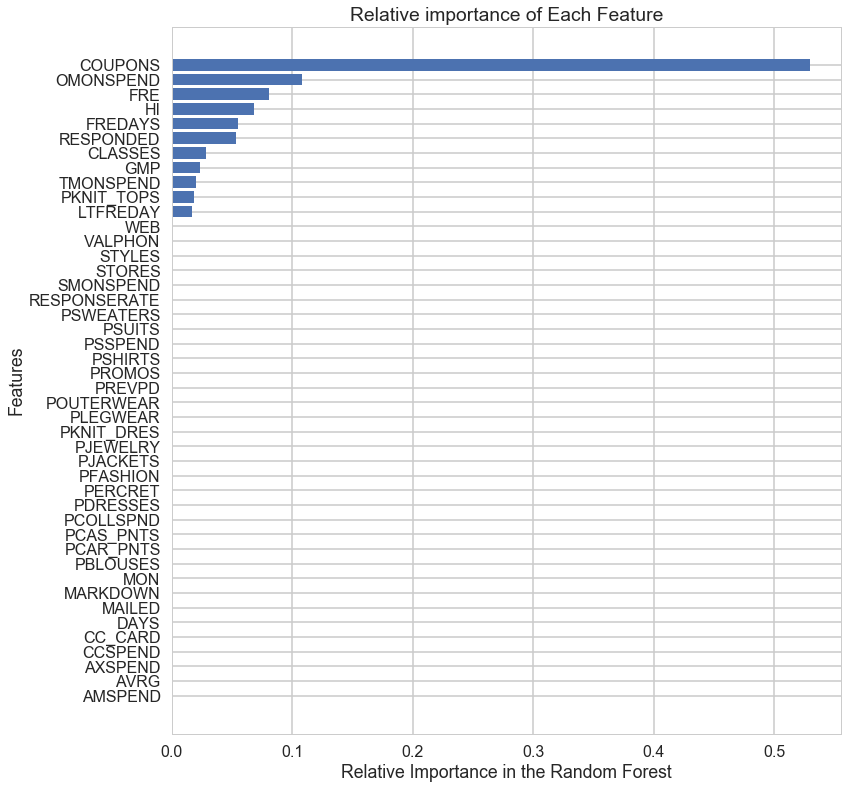

In [45]:
plt.figure(num=None, figsize=(12, 13))
importance_list = clf_rf.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

#### Linear SVC

In [62]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'C': 10.0} 0.278735945161 [mean: 0.27767, std: 0.06791, params: {'C': 0.001}, mean: 0.21041, std: 0.18826, params: {'C': 0.01}, mean: 0.25073, std: 0.14286, params: {'C': 0.1}, mean: 0.20069, std: 0.12610, params: {'C': 1.0}, mean: 0.27874, std: 0.11061, params: {'C': 10.0}, mean: 0.19098, std: 0.10329, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.53
Accuracy on test data:     0.53
[[852 904]
 [ 79 265]]
########################################################


In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = LinearSVC(loss="hinge")
# svc.fit(X_train_scaled, y_train)

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_scaled,y_train,X_test_scaled,y_test,score_func='f1')

BEST {'C': 100.0} 0.125205406344 [mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.00000, std: 0.00000, params: {'C': 0.01}, mean: 0.00000, std: 0.00000, params: {'C': 0.1}, mean: 0.03793, std: 0.02215, params: {'C': 1.0}, mean: 0.00776, std: 0.01033, params: {'C': 10.0}, mean: 0.12521, std: 0.03450, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[1673   83]
 [ 232  112]]
########################################################


#### SVM Rbf

In [403]:
from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train_scaled,y_train,X_test_scaled,y_test,score_func='f1')

BEST {'C': 100.0} 0.130033361153 [mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.00000, std: 0.00000, params: {'C': 0.01}, mean: 0.00000, std: 0.00000, params: {'C': 0.1}, mean: 0.00000, std: 0.00000, params: {'C': 1.0}, mean: 0.03322, std: 0.02064, params: {'C': 10.0}, mean: 0.13003, std: 0.02269, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[1702   54]
 [ 251   93]]
########################################################


#### Balance data

In [193]:
df_train['RESP'].value_counts()

0.0    4137
1.0     763
Name: RESP, dtype: int64

(array([4137.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

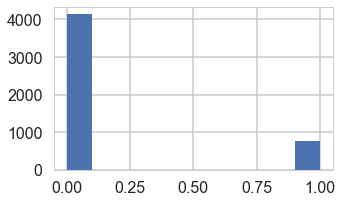

In [201]:
plt.figure( figsize=(5,3))
plt.hist(df_train['RESP'])

In [253]:
jtrain_new=np.arange(0, X_train.shape[0])
ipos_new = np.random.choice(jtrain_new[y_train==1], 300, replace=False)
ineg_new = np.random.choice(jtrain_new[y_train==0], 300, replace=False)
subsampled_i=np.concatenate((ipos_new,ineg_new))
X_train_blc=X_train[subsampled_i]
y_train_blc=np.array(y_train)[subsampled_i]

#### Retest after balance data

In [259]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_blc,y_train_blc,X_test,y_test,score_func='f1')

BEST {'C': 0.001} 0.685689964325 [mean: 0.68569, std: 0.11605, params: {'C': 0.001}, mean: 0.46204, std: 0.25762, params: {'C': 0.01}, mean: 0.53556, std: 0.18652, params: {'C': 0.1}, mean: 0.64999, std: 0.11552, params: {'C': 1.0}, mean: 0.46330, std: 0.32794, params: {'C': 10.0}, mean: 0.41894, std: 0.25949, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.71
Accuracy on test data:     0.74
[[1302  454]
 [  97  247]]
########################################################


In [250]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_blc_scaled = scaler.fit_transform(X_train_blc)
X_test_blc_scaled = scaler.fit_transform(y_train_blc)

svc = LinearSVC(loss="hinge")
# svc.fit(X_train_scaled, y_train)

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_blc_scaled,X_test_blc_scaled,X_test_scaled,y_test,score_func='f1')

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


BEST {'C': 1.0} 0.750525584401 [mean: 0.69371, std: 0.00669, params: {'C': 0.001}, mean: 0.73112, std: 0.06140, params: {'C': 0.01}, mean: 0.71256, std: 0.06312, params: {'C': 0.1}, mean: 0.75053, std: 0.03190, params: {'C': 1.0}, mean: 0.73801, std: 0.03800, params: {'C': 10.0}, mean: 0.74359, std: 0.03078, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.76
Accuracy on test data:     0.66
[[1112  644]
 [  65  279]]
########################################################


In [261]:
from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train_blc,y_train_blc,X_test,y_test,score_func='f1')

BEST {'C': 10.0} 0.669671432629 [mean: 0.66816, std: 0.00182, params: {'C': 0.001}, mean: 0.66816, std: 0.00182, params: {'C': 0.01}, mean: 0.66816, std: 0.00182, params: {'C': 0.1}, mean: 0.66816, std: 0.00182, params: {'C': 1.0}, mean: 0.66967, std: 0.00439, params: {'C': 10.0}, mean: 0.66967, std: 0.00439, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.18
[[  28 1728]
 [   1  343]]
########################################################


#### Neural Networks

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.73


In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_nn = scaler.fit_transform(X_train)
X_test_scaled_nn = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled_nn, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled_nn, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.830


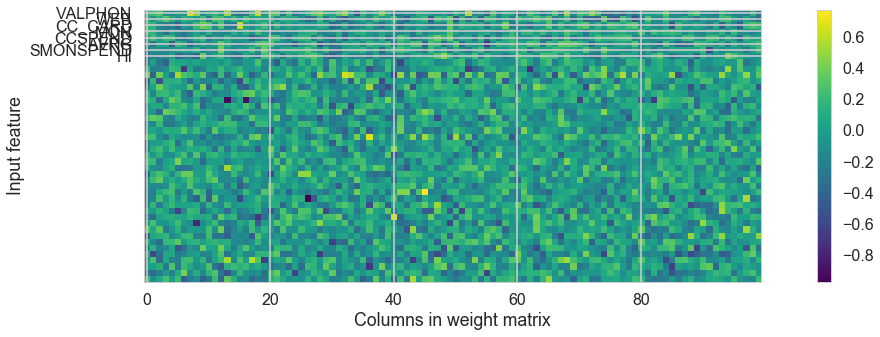

In [136]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), data_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [142]:
clf_mlp = MLPClassifier(random_state=0)
c_grid={'hidden_layer_sizes':[2,3,4,5,6],'activation': ['logistic', 'tanh','relu']}
clf_mlp=cv_optimize(clf_mlp,c_grid,X_train_scaled_nn,y_train,X_test_scaled_nn,y_test,score_func='f1')

BEST {'activation': 'tanh', 'hidden_layer_sizes': 3} 0.326732942888 [mean: 0.24040, std: 0.05085, params: {'activation': 'logistic', 'hidden_layer_sizes': 2}, mean: 0.00000, std: 0.00000, params: {'activation': 'logistic', 'hidden_layer_sizes': 3}, mean: 0.21546, std: 0.04570, params: {'activation': 'logistic', 'hidden_layer_sizes': 4}, mean: 0.29084, std: 0.07199, params: {'activation': 'logistic', 'hidden_layer_sizes': 5}, mean: 0.27833, std: 0.04990, params: {'activation': 'logistic', 'hidden_layer_sizes': 6}, mean: 0.32588, std: 0.06141, params: {'activation': 'tanh', 'hidden_layer_sizes': 2}, mean: 0.32673, std: 0.04298, params: {'activation': 'tanh', 'hidden_layer_sizes': 3}, mean: 0.29144, std: 0.04643, params: {'activation': 'tanh', 'hidden_layer_sizes': 4}, mean: 0.29991, std: 0.05760, params: {'activation': 'tanh', 'hidden_layer_sizes': 5}, mean: 0.29765, std: 0.06234, params: {'activation': 'tanh', 'hidden_layer_sizes': 6}, mean: 0.27888, std: 0.05703, params: {'activation':

#### Xgboost

In [147]:
%%time
import xgboost as xgb
clf_Xgb = xgb.XGBClassifier()
parameters = {"n_estimators": range(1, 20),"reg_alpha":[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_Xgb=cv_optimize(clf_Xgb,parameters,X_train,y_train,X_test,y_test,score_func='f1')

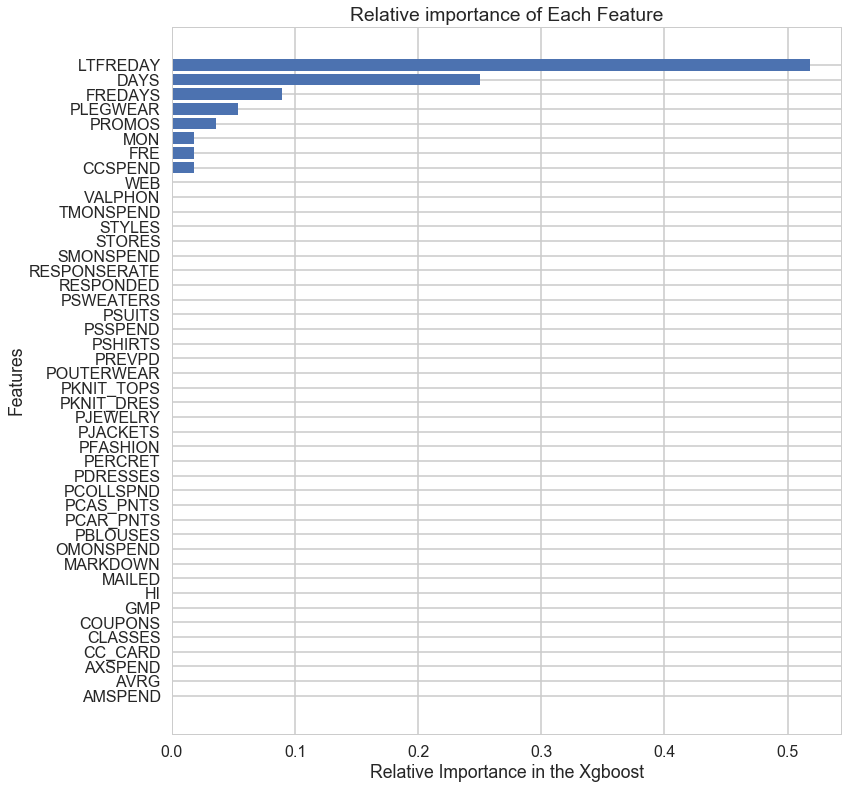

In [149]:
plt.figure(num=None, figsize=(12, 13))
importance_list = clf_Xgb.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Xgboost')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()


#### Feature importance comparison Random Forest and Xgboost

In [176]:
axes

(<matplotlib.figure.Figure at 0x257bd588>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002C508A58>,
       dtype=object))

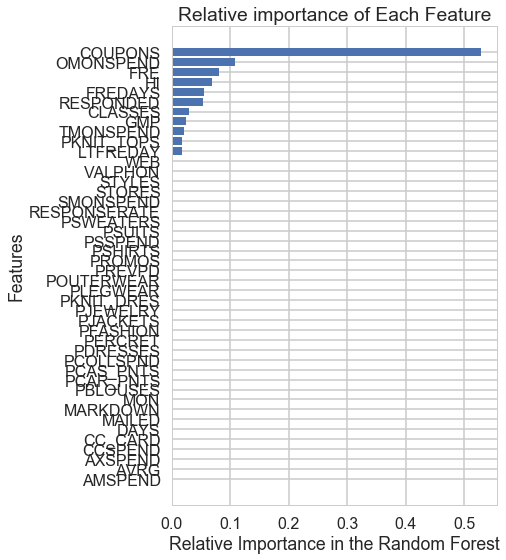

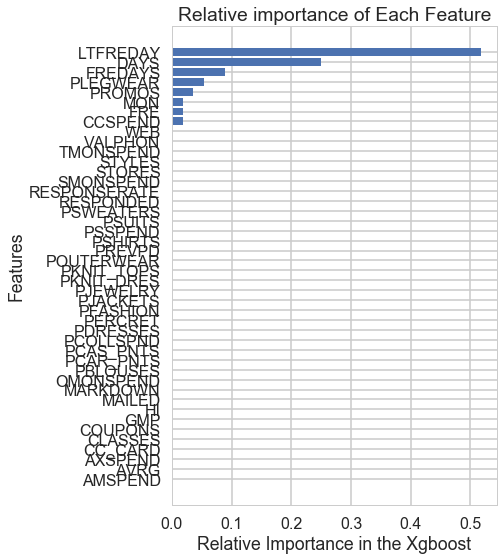

In [190]:

plt.subplot(1, 2, 1)
importance_list = clf_rf.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

plt.subplot(1, 2, 2)
importance_list = clf_Xgb.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Xgboost')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

#### PCA

#### Standardization

In [325]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_pca = scaler.fit_transform(X_train)
X_test_scaled_pca = scaler.fit_transform(X_test)

#### Get top PCA for training and test data

#### Training data PCA

In [375]:
from sklearn.decomposition import PCA
pca_train_eigvct = PCA(n_components=25)
X_train_pca = pca_train_eigvct.fit_transform(X_train_scaled_pca)

#### Test data PCA

In [376]:
X_test_pca = pca_train_eigvct.fit_transform(X_test_scaled_pca)

#### Training data variance explained by PCA

In [377]:
print pca_train_eigvct.explained_variance_ratio_.sum()

0.8868804204167958


In [378]:
pca_train_eigvct.explained_variance_ratio_*100

array([23.20370222,  6.61334462,  5.32266195,  3.92322833,  3.30915066,
        3.00003451,  2.74648532,  2.69230851,  2.61969669,  2.60695215,
        2.58236499,  2.53073423,  2.4659307 ,  2.41294384,  2.36161093,
        2.28982853,  2.25485202,  2.19611039,  2.09855008,  2.08316951,
        2.01960268,  1.97860562,  1.87858844,  1.83337254,  1.66421258])

#### PCA for traing data dataframe and plots

In [379]:
df_train_pca = pd.DataFrame({"y":y_train.values})
for i in range(pca_train_eigvct.explained_variance_ratio_.shape[0]):
    df_train_pca["pc%i" % (i+1)] = X_train_pca[:,i]
df_train_pca.head()

,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25
0,1,3.569422,-2.742522,0.040907,-1.862057,0.251343,1.903336,1.669528,0.786189,-0.414600,-0.365104,0.365337,-0.521504,0.011482,0.447373,0.259334,0.035376,0.134974,0.094227,-1.124749,0.010211,1.415975,1.964590,0.154560,1.203861,0.212434
1,0,-2.439334,-0.607897,1.546053,-0.015255,-2.036798,0.678421,-1.393717,-0.892654,-0.398476,-1.915573,0.284311,-1.275676,-0.261534,-0.799980,0.305710,0.770839,0.205845,-0.806846,-0.054391,-0.496733,0.063366,1.727430,-2.182474,-1.106843,-0.066290
2,0,-0.819555,-1.604957,2.353249,-0.254999,0.623814,-0.912542,1.423062,-1.311109,1.263051,0.285941,-0.903040,-0.236239,-0.225992,-0.071309,-0.941273,-0.047340,-0.349550,-0.572229,0.316125,1.459393,-1.373660,0.044874,0.433500,0.337949,0.579152
3,0,4.786537,0.934729,0.557838,0.122552,0.285808,-0.896117,-0.917131,-0.684212,-0.510764,1.772488,1.416601,-0.050749,0.355781,-0.115249,0.160872,-0.245976,0.465403,-0.457014,-0.203732,0.573873,0.341700,-0.127033,0.489161,-0.945441,-0.601203
4,0,0.488543,-0.921586,-0.971252,-0.462002,0.678816,-0.970018,-0.347261,0.436817,-0.185844,0.696294,0.135827,0.147200,0.583165,-0.133837,-0.579467,-0.982288,-1.203202,0.358246,0.880443,0.026781,-0.292711,-0.144982,0.278991,-0.680206,0.866968


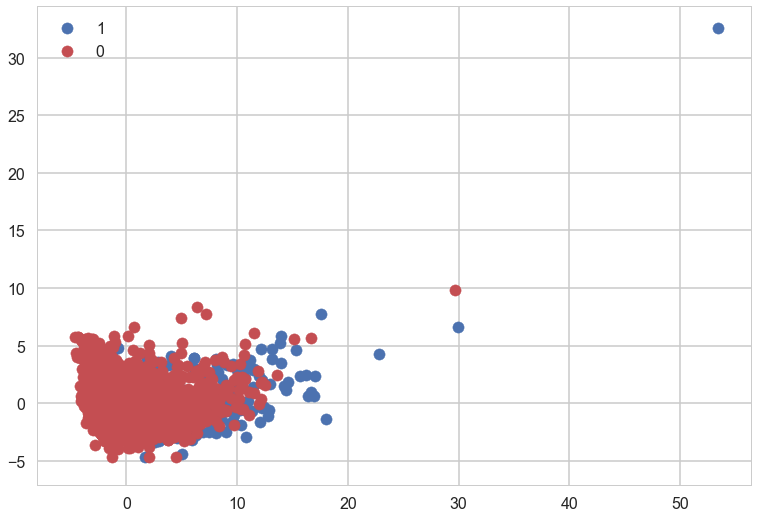

In [380]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

colors = [c0, c2]
for label, color in zip(df_train_pca['y'].unique(), colors):
    mask = df_train_pca['y']==label
    plt.scatter(df_train_pca[mask]['pc1'], df_train_pca[mask]['pc2'], c=color, label=label)
plt.legend()

#### PCA fort test data

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
ys_pca=df_pca['y'].astype(int).values
subdf=df_pca.ix[:,1:]
Xs_pca=subdf.values

#### Correlation coefficient matrix

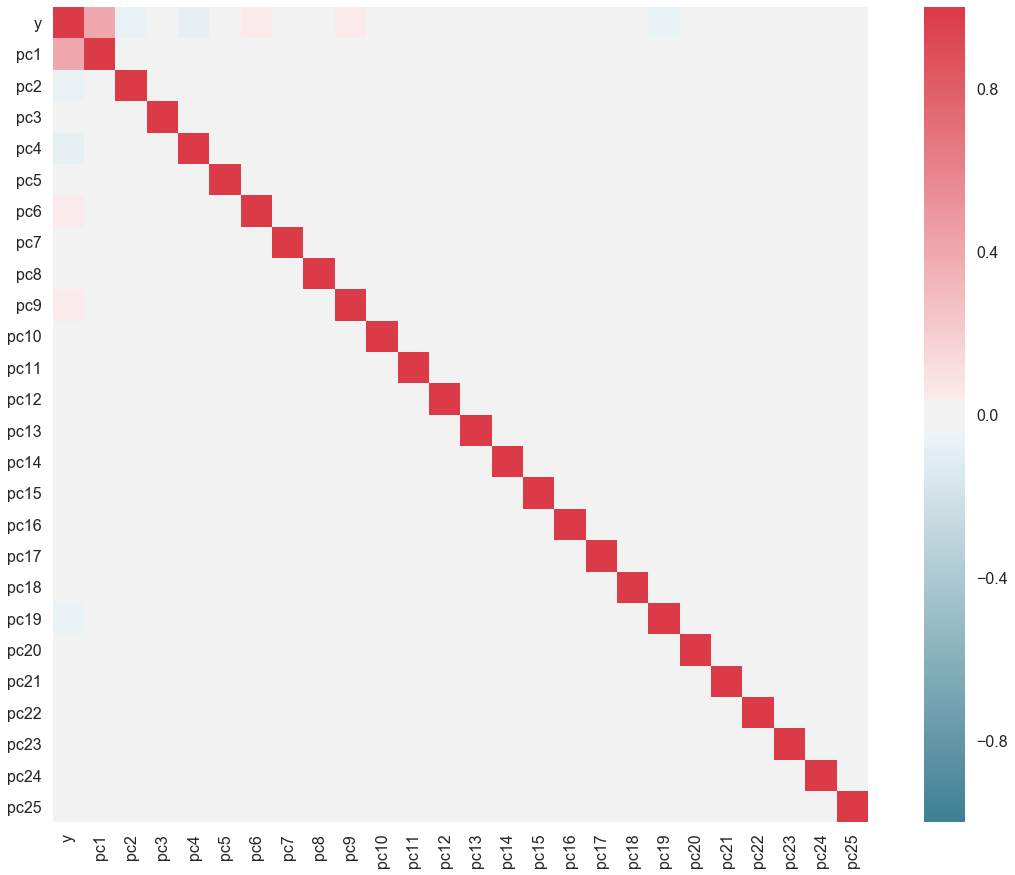

In [383]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))
corr = df_train_pca.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

#### Retrain model for PCA top 25 princple conponents

#### KNN with PCA

In [388]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
parameters={'n_neighbors':range(5,6,7)}
clf_knn_pca=cv_optimize(clf,parameters,X_train_scaled_pca,y_train,X_test_scaled_pca,y_test,score_func='f1')

BEST {'n_neighbors': 5} 0.257621140167 [mean: 0.25762, std: 0.03902, params: {'n_neighbors': 5}]
############# based on standard predict ################
Accuracy on training data: 0.88
Accuracy on test data:     0.84
[[1687   69]
 [ 267   77]]
########################################################


#### Logistic lasso Regression with PCA

In [392]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1_pca=cv_optimize(logclf,c,X_train_scaled_pca,y_train,X_test_scaled_pca,y_test,score_func='f1')

BEST {'C': 100.0} 0.314280392878 [mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.25742, std: 0.05155, params: {'C': 0.1}, mean: 0.30942, std: 0.06174, params: {'C': 10.0}, mean: 0.31428, std: 0.06001, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.84
[[1699   57]
 [ 277   67]]
########################################################
Wall time: 1min 58s


#### Random Forest with PCA

In [399]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf_pca=cv_optimize(clfForest,parameters,X_train_scaled_pca,y_train,X_test_scaled_pca,y_test,score_func='f1')

BEST {'n_estimators': 3, 'max_depth': 8, 'min_samples_leaf': 4} 0.369073974646 [mean: 0.24687, std: 0.05488, params: {'n_estimators': 1, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.28886, std: 0.06316, params: {'n_estimators': 2, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.25221, std: 0.05741, params: {'n_estimators': 3, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27668, std: 0.07452, params: {'n_estimators': 4, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.28045, std: 0.03241, params: {'n_estimators': 5, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.24889, std: 0.06070, params: {'n_estimators': 6, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27576, std: 0.04200, params: {'n_estimators': 7, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.29505, std: 0.05874, params: {'n_estimators': 8, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.28629, std: 0.02750, params: {'n_estimators': 9, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.28704, std: 0.04899, params: {'n_estima

#### SVMs with PCA

In [401]:
clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc_pca=cv_optimize(clfsvm,c_grid,X_train_scaled_pca,y_train,X_test_scaled_pca,y_test,score_func='f1')

BEST {'C': 100.0} 0.309360735091 [mean: 0.16487, std: 0.02659, params: {'C': 0.001}, mean: 0.08168, std: 0.03305, params: {'C': 0.01}, mean: 0.10187, std: 0.02474, params: {'C': 0.1}, mean: 0.06579, std: 0.03726, params: {'C': 1.0}, mean: 0.12545, std: 0.09331, params: {'C': 10.0}, mean: 0.30936, std: 0.10647, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.79
[[1469  287]
 [ 158  186]]
########################################################


In [406]:
from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svm_Rbf_pca=cv_optimize(rbf_svm,c_grid,X_train_scaled_pca,y_train,X_test_scaled_pca,y_test,score_func='f1')

BEST {'C': 100.0} 0.343031892521 [mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.00000, std: 0.00000, params: {'C': 0.01}, mean: 0.00000, std: 0.00000, params: {'C': 0.1}, mean: 0.17602, std: 0.03612, params: {'C': 1.0}, mean: 0.28075, std: 0.03350, params: {'C': 10.0}, mean: 0.34303, std: 0.03952, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.80
[[1589  167]
 [ 243  101]]
########################################################


#### Model comparison ROC curve.

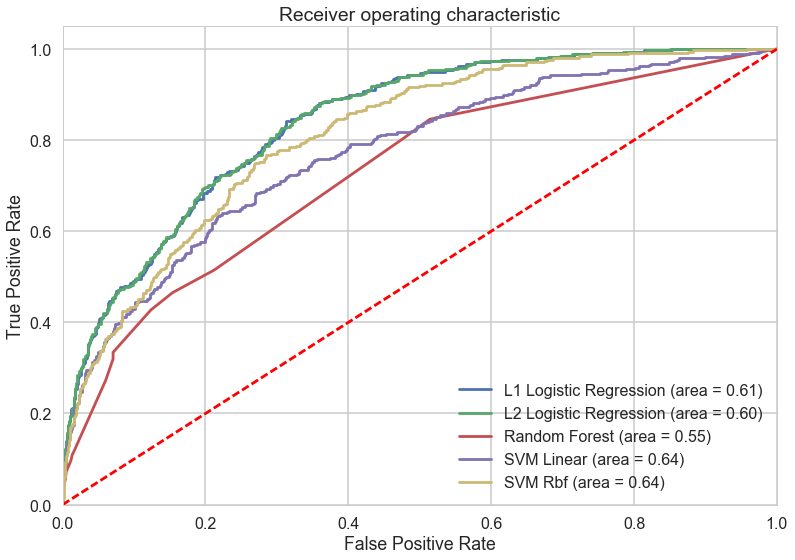

In [145]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_L1_roc_auc = roc_auc_score(y_test, clf_l1.predict(X_test))
l1fpr, l2tpr, thresholds = roc_curve(y_test, clf_l1.predict_proba(X_test)[:,1])

logit_L2_roc_auc = roc_auc_score(y_test, clf_l2.predict(X_test))
l2_fpr, l2_tpr, thresholds = roc_curve(y_test, clf_l2.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, clf_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])

svm_linear_roc_auc = roc_auc_score(y_test, clf_svc.predict(X_test_scaled))
svm_fpr, svm_tpr, rf_thresholds = roc_curve(y_test, clf_svc.decision_function(X_test_scaled))

clf_svm_Rbf_roc_auc = roc_auc_score(y_test, clf_svm_Rbf.predict(X_test_scaled))
svm_rbf_fpr, svm_rbf_tpr, rf_thresholds = roc_curve(y_test, clf_svm_Rbf.decision_function(X_test_scaled))

plt.figure()
plt.plot(l1fpr, l2tpr, label='L1 Logistic Regression (area = %0.2f)' % logit_L1_roc_auc)
plt.plot(l2_fpr, l2_tpr, label='L2 Logistic Regression (area = %0.2f)' % logit_L2_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM Linear (area = %0.2f)' % svm_linear_roc_auc)
plt.plot(svm_rbf_fpr, svm_rbf_tpr, label='SVM Rbf (area = %0.2f)' % svm_linear_roc_auc)

# plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [129]:
def make_roc(name, clf, y_test, X_test, ax=None, labe=5, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(y_test, clf.decision_function(X_test))
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

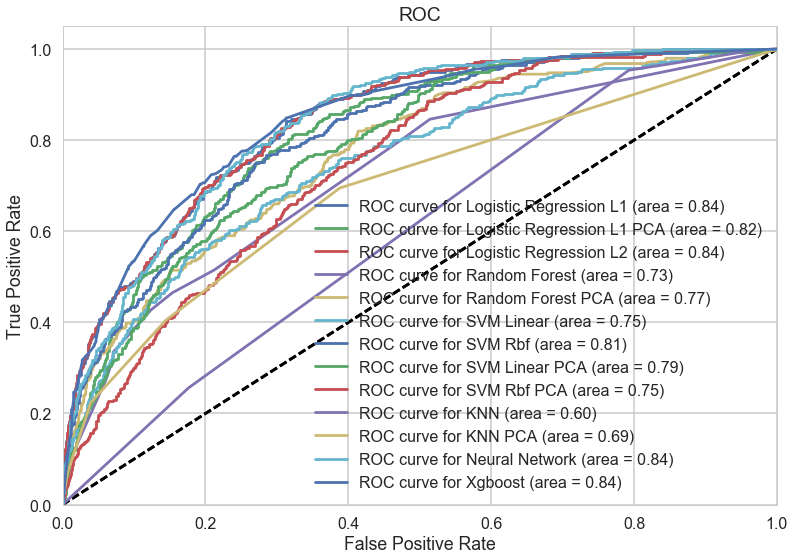

In [407]:
ax=make_roc('Logistic Regression L1',clf_l1,y_test, X_test)
make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
make_roc('Logistic Regression L2',clf_l2,y_test, X_test,ax)
make_roc('Random Forest',clf_rf,y_test, X_test,ax)
make_roc('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,ax)
make_roc('SVM Linear',clf_svc,y_test, X_test_scaled,ax,proba=False)
make_roc('SVM Rbf',clf_svm_Rbf,y_test, X_test_scaled,ax,proba=False)
make_roc('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,ax,proba=False)
make_roc('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,ax,proba=False)
make_roc('KNN',clf_knn,y_test, X_test,ax)
make_roc('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,ax)
make_roc('Neural Network',clf_mlp,y_test, X_test_scaled_nn,ax)
make_roc('Xgboost',clf_Xgb,y_test, X_test,ax)

#### 5.1 Compare multiple classifiers to make a decision on which one to use.

The 'logistic-with-lasso' is the best classifier with AUC of 0.84, followed by 'rbf-svm-feature-selected-balanced’ then ‘svm-all-features-balanced’. The svm with selected features provides a major improvement over the svm using all the features. Generally the logistic seems to be doing better than the svm, however there are points at which svm with selected features dominates the logistic regression with lasso.

### Utility and Profit analysis

Costs for True Positives, False Negatives, False Positives, and True Negatives

Lets categorize the costs for each one of these alternatives.

Lets assume the amortized cost of preparing a mailing and mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).

True Negatives cost us nothing but gain us nothing either.

In [470]:
df.AVRG.mean()

114.64402285713957

In [53]:
tnc=0.0 #tnr stands for "true negative cost"

In [54]:
prep_and_mail=3
profit_margin=0.3
tpc=prep_and_mail - df.AVRG.mean()*profit_margin 
tpc

-31.39320685714187

In [55]:
fnc = df.AVRG.mean()*profit_margin
fnc

34.39320685714187

In [56]:
fpc=prep_and_mail
fpc

3

In [57]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

array([[  0.        ,   3.        ],
       [ 34.39320686, -31.39320686]])

#### utility matrix or profit matrix

In [58]:
u = - risk_matrix
u

array([[ -0.        ,  -3.        ],
       [-34.39320686,  31.39320686]])

In [59]:
# def average_profit_pp(y, ypred, u):
#     c=confusion_matrix(y,ypred)
#     score=np.sum(c*u)/np.sum(c)
#     return score

In [60]:
testsize = df_train.shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print confusion_matrix(y_train, ypred_dste)
dsteval=average_profit_pp(y_train, ypred_dste, u)
dsteval

[[4137    0]
 [ 763    0]]


-5.35551363918352

In [61]:
np.sum(confusion_matrix(y_train, ypred_dste)*u)/np.sum(testsize)

-5.35551363918352

### Establishing Baseline Classifiers via profit

#### Dont Send to Anyone Baseline Classifier

This is the "majority" classifier we talked about earlier. We dont send mailings to anyone because we believe that no-one will respond. Thus this classifier predicts everyone to be a 0 or -ive, a non-respondent. Remember, this classifier has a 83-84% accuracy.

We write a confusion matrix dste for the "dont send to everyone" model (not the best acronym, I know!), and calculate the average profit per person as dsteval.

In test set, we model if we do not send any coupons to customers.

In [396]:
testsize = y_test.shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print confusion_matrix(y_test, ypred_dste)
dsteval=average_profit_pp(y_test, ypred_dste, u)
dsteval

[[1756    0]
 [ 344    0]]


-5.633934837550859

Not sending out the mailers amounts to losing $5.60 in potential profit per every person. Even sending them out randomly (untargeted) should increase potential profit. However a more targeted approach is prefered.

#### Send to Everyone Baseline Classifier

This is the other extreme. In this case we predict everyone as responders and send the mailing to everyone. In other words, we predict everyone on the test set to be a 1. Print out both the confusion matrix and steval, the average profit per person, for this case. Based on this result, which one of these two classifiers is the one to beat? Why?

In [397]:
ypred_ste = np.ones(testsize, dtype="int")
print confusion_matrix(y_test, ypred_ste)
steval = average_profit_pp(y_test, ypred_ste, u)
steval

[[   0 1756]
 [   0  344]]


2.633934837550859

Sending to everyone is definitely the one to beat, even when taking into account the cost of sending out to everyone we’ll be making a profit of about $2.59 per person. Reading this together with question in 2.1 gives us the overall message that just one metric can not be used to effectively make an effective business decision.

#### 2.4 Compare the Logistic Lasso classifier with these baselines

In [465]:
#your code here
average_profit_pp(y_test, clf_l1.predict(X_test), u)

-3.169214315101954

In [426]:
confusion_matrix(y_test,clf_l1.predict(X_test))

array([[1727,   29],
       [ 264,   80]])

We were doing something wrong there.

In the case of such asymmetric costs, the sklearn API function predict is useless, as it assumes a threshold probability of having a +ive sample to be 0.5; that is, if a sample has a greater than 0.5 chance of being a 1, assume it is so. Clearly, when FN are more expensive than FP, you want to lower this threshold: you are ok with falsely classifying -ive examples as +ive. See Lab 5 for how this can be done.

You can think about this very starkly from the perspective of the cancer doctor. Do you really want to be setting a threshold of 0.5 probability to predict if a patient has cancer or not? The false negative problem: ie the chance you predict someone dosent have cancer who has cancer is much higher for such a threshold. You could kill someone by telling them not to get a biopsy. Why not play it safe and assume a much lower threshold: for eg, if the probability of 1(cancer) is greater than 0.05, we'll call it a 1.

Let us do this for our logistic regression example

Start with an arbitrary threshold t, and see how we fare at different thresholds for logistic regression

In [427]:
def t_repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

#### (a) t=0.5 usual case

In [431]:
average_profit_pp(y_test,clf_l1.predict(X_test), u)

-3.169214315101954

#### (b) Confusion Matrix and average profit per person for t=0.05

In [433]:
confusion_matrix(y_test,t_repredict(clf_l1, 0.05, X_test))

array([[812, 944],
       [ 16, 328]])

#### Since threshould is low and false positive increases and false negative decreases. The false negative costs more then false positive. So it decreases overall cost.

In [434]:
confusion_matrix(y_test,clf_l1.predict(X_test))

array([[1727,   29],
       [ 264,   80]])

In [435]:
average_profit_pp(y_test, t_repredict(clf_l1, 0.05, X_test), u)

3.2927050187753637

#### (c) average profit per person for t=0.95

In [436]:
average_profit_pp(y_test, t_repredict(clf_l1, 0.95, X_test), u)

-5.633934837550859

In [440]:
roc_curve(y_test, clf_l1.predict(X_test))

(array([0.        , 0.01651481, 1.        ]),
 array([0.        , 0.23255814, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [441]:
clf_l1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 3.3 Implement a function to calculate average profit per person¶
Implement a function av_profit(tpr, fpr, util, priorp, priorn) to calculate average profit per person given the utility matrix, the FPR rate, the TPR rate, and class balance.

You will need to look at the diagram of the confusion matrix, and the formula for profit, to derive the formula used in the function you must implement. Present your derivation below the code.

#### The proportaion of customers that woud recive coupon 

We have implemented the function percentage(tpr, fpr, priorp, priorn) to calculate the percentage of samples classified positive at a given tpr/fpr (ie a classifier for a given threshold).

The variable priorp is the fraction of actual positive samples in the test set (OP), and priorn is the percentage of actual -ive (0) samples in the test set (ON).

In [452]:
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc

We provide code to plot a profit curve below, to which we must provide two critical functions:

* code to calculate expected profit given the TPR and FPR from a classifier (this is different than our average_profit_pp above as we now want this in terms of TPR and FPR.
* code to calculate the percentage of samples classified positive.given the TPR and FPR of a classifier.


In [453]:
"""
Function
--------
av_profit

Inputs
------
tpr: true positive rate
fpr: false positive rate
util: utility matrix for this problem
priorp: the probability of observed +ives (OP) on our test set
priorn: the probability of observed +ives (ON) on our test set

   
Returns
-------
The average profit per person at this (fpr, tpr) point in this ROC space.
     
Notes
-----
see make_profit below for an example of how this is used
"""
#your code here
def av_profit(tpr, fpr, util, priorp, priorn):
    profit = priorp*(util[1][1]*tpr+util[1][0]*(1.-tpr))+priorn*(util[0][0]*(1.-fpr) +util[0][1]*fpr)
    return profit

In [454]:
def make_profit(name, clf, ytest, xtest, util, ax=None, threshold=False, labe=200, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.3, markersize=5, label='utlity curve for %s' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
        )
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right")
    return ax

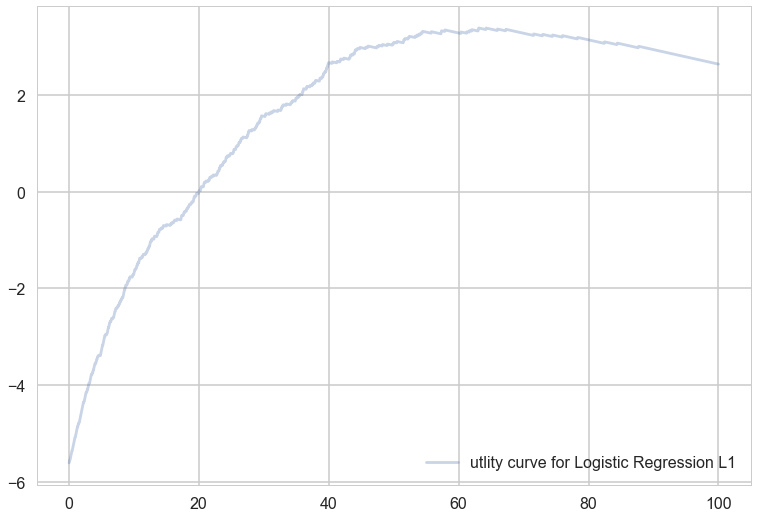

In [472]:
ax=make_profit('Logistic Regression L1', clf_l1, y_test, X_test, u)
# make_roc('Logistic Regression L1 PCA',clf_l1_pca,y_test, X_test_scaled_pca)
# make_profit('Logistic Regression L2',clf_l2,y_test, X_test,u)
# make_profit('Random Forest',clf_rf,y_test, X_test,u)
# make_profit('Random Forest PCA',clf_rf_pca,y_test, X_test_scaled_pca,u)
# make_profit('SVM Linear',clf_svc,y_test, X_test_scaled,u,proba=False)
# make_profit('SVM Rbf',clf_svm_Rbf,y_test, X_test_scaled,u,proba=False)
# make_profit('SVM Linear PCA',clf_svc_pca,y_test, X_test_scaled_pca,u,proba=False)
# make_profit('SVM Rbf PCA',clf_svm_Rbf_pca,y_test, X_test_scaled_pca,u,proba=False)
# make_roc('KNN',clf_knn,y_test, X_test,ax)
# make_profit('KNN PCA',clf_knn_pca,y_test, X_test_scaled_pca,u)
# make_profit('Neural Network',clf_mlp,y_test, X_test_scaled_nn,u)
# make_profit('Xgboost',clf_Xgb,y_test, X_test,u)